# Homework 2
When the requirement is to infer or predict the pattern of completely independent random events in a fixed time or space or area or volume, the probabality distribution that applies is Poisson. We model the probability mass function with Poisson which means, we in this case means, determining the probability of a specific count of tweets.

### a)


In [227]:
import numpy as np
import matplotlib.pylab as plt
import csv
import pandas as pd

twdf = pd.read_csv("tweet_counts.csv",header='infer')
print(twdf)
##Pandas is an abstraction on numpy arrays. It uses numpy ndarrays to store the data. 
#mean_tweet_counts = np.mean(twdf["count"])
mean_tweet_counts = twdf["count"].mean()
print("Mean number of counts is ", mean_tweet_counts)   

    week  count
0      1   39.0
1      2   46.0
2      3   41.0
3      4   42.0
4      5   31.0
5      6   44.0
6      7   33.0
7      8   42.0
8      9   31.0
9     10   28.0
10    11   36.0
11    12   40.0
12    13   33.0
13    14   45.0
14    15   42.0
15    16   28.0
16    17   34.0
17    18   42.0
18    19   45.0
19    20   37.0
20    21   39.0
21    22   35.0
22    23   28.0
23    24   30.0
24    25   24.0
25    26   40.0
26    27   22.0
27    28   46.0
28    29   37.0
29    30   37.0
30    31   38.0
31    32   36.0
32    33   41.0
33    34   38.0
34    35   42.0
35    36   43.0
36    37   30.0
37    38   45.0
38    39   46.0
39    40   51.0
40    41   55.0
41    42   36.0
42    43   42.0
43    44   44.0
44    45   36.0
45    46   44.0
46    47   41.0
47    48   38.0
48    49   38.0
49    50   56.0
50    51   39.0
51    52   40.0
Mean number of counts is  38.76923076923077


#### The Mean number of counts is  38.76923076923077

### b) Using pyplot bar to show the tweet trends

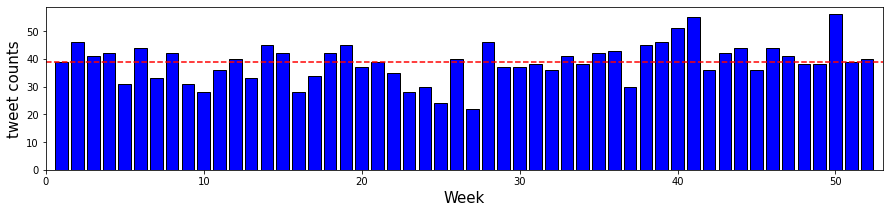

In [228]:
plt.figure(figsize=(15,3))
plt.bar(np.arange(1,53),twdf["count"], color='blue',edgecolor='black')
#y_mean = [mean_tweet_counts] * len(twdf["count"].size())
plt.axhline(mean_tweet_counts, label='Mean', linestyle='--', color='r')
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('tweet counts',fontsize=15)
plt.show()

Looking at the chart, it does seem like Bob's tweeting habits have changed around week 30. However, lets start out assuming there is no change. With that, there is a constant λ 

In [230]:
#lets define the Poisson distribution method
Poisson=lambda k,λ:(λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

In [123]:
# plt.figure(figsize=(8,5))
# plt.hist(twdf["count"], density=True)
# plt.plot(twdf["week"],Poisson(twdf["count"],mean_tweet_counts), c='r', marker='o')
# plt.ylabel('Probability of #tweets',fontsize=15)
# plt.xlabel('tweets',fontsize=15)
# plt.show()

In [231]:
Exponential= lambda λ,α:λ*np.exp(-λ*α)
Exponential=np.vectorize(Exponential)

### c)

λ is a constant representing an expected value of number of tweets in a week. But this does not assume any prior knowledge. We are supposed to determine posterior probability which needs to take into account our beliefs and known information. The priori is what we expect to be an average tweet per week count for an average twitter user. 

If we break down the probability into smaller time windows and every minute either has a tweet or not, λ can also be understood as below
λ = number of tweets * probability of each tweet 

### d)

Lets take alpha as 1/mean_tweet_counts 0.025793650793650796


Text(0, 0.5, '$P(λ)$')

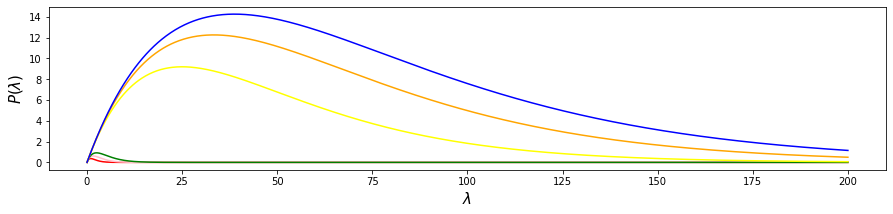

In [232]:
#Pictorially prove that as α goes low, the probability of λ goes up.
plt.figure(figsize=(15,3))
alpha=1.0
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),alpha), c='red')
alpha=0.6
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),alpha),c='pink')
alpha=0.4
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),alpha),c='green')
alpha=0.04
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),alpha),c='yellow')
alpha=0.03
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),alpha),c='orange')
print("Lets take alpha as 1/mean_tweet_counts", 1/mean_tweet_counts)
alpha=1/mean_tweet_counts #0.04
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),alpha),c='blue')
plt.xlabel("$λ$",fontsize=15)
plt.ylabel("$P(λ)$",fontsize=15)

### Notice how the Probability Distribution of Lambda i.e P(λ) changes it shape. α is our a priori belief of how many tweets an average person tweets routinely. The higher the value of α,  the more spread out and smaller the value of λ as well as the distribution for P(λ) is.  This proves the converse relation between λ and α.

We can do 2 approaches, 

First, based on the data, assuming a constant λ, check the value of α, which ends up being 0.025793650793650796. Or we can consider 2 λs.



In [233]:
λ_est=np.linspace(0,60,2000)

In [234]:
 def Posterior_tweet(λ_est,tweet_count):
        """
        Posterier_tweet gives a probability of getting a certain number of tweets given the
        priori information.
        """
        return np.prod(Poisson(tweet_count,λ_est)*Exponential(λ_est,alpha))


In [237]:
P_=np.array([])
for j in λ_est:
    P_=np.append(P_,Posterior_tweet(j,twdf["count"]))

Posterior=P_/np.trapz(P_,λ_est)
λ_mode=λ_est[np.argmax(Posterior)]
λ_mode    

38.779389694847424

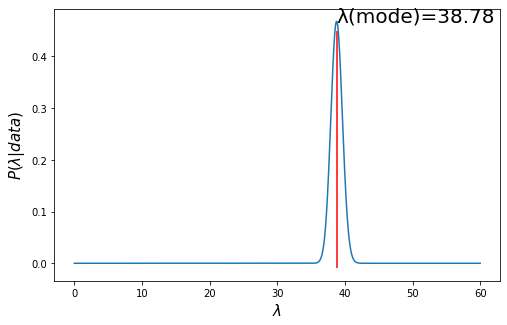

In [238]:
plt.figure(figsize=(8,5))
plt.plot(λ_est,Posterior)
plt.vlines(λ_mode,-0.01,0.45,color='red')
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.text(λ_mode,np.max(Posterior),'λ(mode)={:0.2f}'.format(λ_mode),fontsize=20)
plt.show()

In [239]:
μ=np.trapz(λ_est*Posterior,λ_est)
μ

38.78797797946735

In [240]:
σ=np.sqrt(np.trapz(((λ_est-μ)**2)*Posterior,λ_est))
σ

0.8527405102565475

In [131]:
mask=(λ_est>=(λ_mode-σ))&(λ_est<=(λ_mode+σ))
np.trapz(Posterior[mask],λ_est[mask])

0.5755146547241694

### e) Visualizing the data tells us that there is an increase in number of tweets around week 30. So if we want to split the input dataset into 2 dataframes around week 30 and compute 2 averages or λ, we may notice a difference in trending. 

In [198]:
tw_bfr_w30 = twdf[twdf["week"] <30]
λ1 = tw_bfr_w30["count"].mean()
λ1

36.55172413793103

In [242]:
P_b_w30_=np.array([])
for j in λ_est:
    P_b_w30_=np.append(P_b_w30_,Posterior_tweet(j,tw_bfr_w30["count"]))

Posterior_b_w30=P_b_w30_/np.trapz(P_b_w30_,λ_est)
λ1_mode=λ_est[np.argmax(Posterior_b_w30)]
λ1_mode   

36.61830915457729

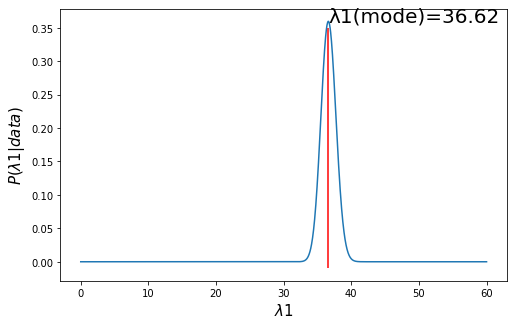

In [245]:
plt.figure(figsize=(8,5))
plt.plot(λ_est,Posterior_b_w30)
plt.vlines(λ1_mode,-0.01,0.35,color='red')
plt.xlabel('$\lambda1$',fontsize=15)
plt.ylabel('$P(λ1|data)$',fontsize=15)
plt.text(λ1_mode,np.max(Posterior_b_w30),'λ1(mode)={:0.2f}'.format(λ1_mode),fontsize=20)
plt.show()

In [246]:
tw_aft_w30 = twdf[twdf["week"] >= 30]
λ2 = tw_aft_w30["count"].mean()
λ2

41.56521739130435

In [248]:
P_a_w30_=np.array([])
for j in λ_est:
    P_a_w30_=np.append(P_a_w30_,Posterior_tweet(j,tw_aft_w30["count"]))

Posterior_a_w30=P_a_w30_/np.trapz(P_a_w30_,λ_est)
λ2_mode=λ_est[np.argmax(Posterior_a_w30)]
λ2_mode

41.480740370185096

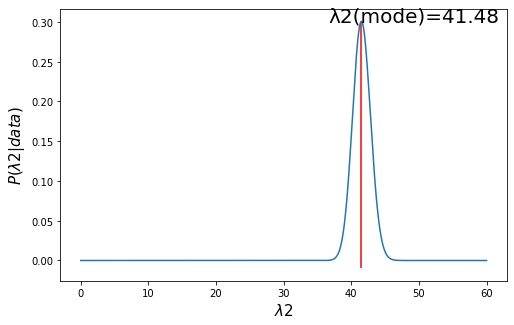

In [252]:
plt.figure(figsize=(8,5))
plt.plot(λ_est,Posterior_a_w30)
plt.vlines(λ2_mode,-0.01,0.30,color='red')
plt.xlabel('$\lambda2$',fontsize=15)
plt.ylabel('$P(λ2|data)$',fontsize=15)
plt.text(λ1_mode,np.max(Posterior_a_w30),'λ2(mode)={:0.2f}'.format(λ2_mode),fontsize=20)
plt.show()

### Explanation of the observed behavior:
